In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [223]:
df = pd.read_csv("data/orders.csv", header=None)

In [224]:
names = {0: "order_id",
1: "activation_time_local", 
2: "country_code", 
3: "store_address", 
4: "final_status", 
5: "payment_status", 
6: "products", 
7: "products_total", 
8: "purchase_total_price"}

df = df.rename(columns=names)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               60400 non-null  int64  
 1   activation_time_local  60400 non-null  object 
 2   country_code           60400 non-null  object 
 3   store_address          60400 non-null  int64  
 4   final_status           60400 non-null  object 
 5   payment_status         60400 non-null  object 
 6   products               60400 non-null  int64  
 7   products_total         60400 non-null  float64
 8   purchase_total_price   60400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


In [226]:
def compare_values(row):
    if row['products_total'] < row['purchase_total_price']:
        return 'under-authorized'
    else:
        return 'authorized'


df['auth_status'] = df.apply(compare_values, axis=1)

In [227]:
def compare_values_20(row):
    if (row['products_total']*1.2) < row['purchase_total_price']:
        return 'under-authorized'
    else:
        return 'authorized'
    
df['auth_status_20'] = df.apply(compare_values_20, axis=1)

In [228]:
df.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,auth_status,auth_status_20
0,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,under-authorized,under-authorized
1,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,authorized,authorized
2,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,authorized,authorized
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,authorized,authorized
4,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,under-authorized,under-authorized


In [229]:
under_authorized_count = df[df['auth_status'] == 'under-authorized'].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

percentage_under_authorized = (under_authorized_count / total_orders) * 100

print(f"The percentage of orders that are under-authorized is: {percentage_under_authorized:.2f}%")

The percentage of orders that are under-authorized is: 57.58%


In [230]:
authorized_20_count = df[df['auth_status_20'] == 'authorized'].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

percentage_authorized = (authorized_20_count / total_orders) * 100

print(f"The percentage of orders that are authorized is: {percentage_authorized:.2f}%")

The percentage of orders that are authorized is: 69.03%


In [231]:
# QUESTION 2:

In [232]:
filter_1 = df["auth_status"] == "under-authorized"
filter_2 = df["auth_status"] == "authorized"

In [233]:
df_filtered_under = df[filter_1]
df_filtered_auth = df[filter_2]

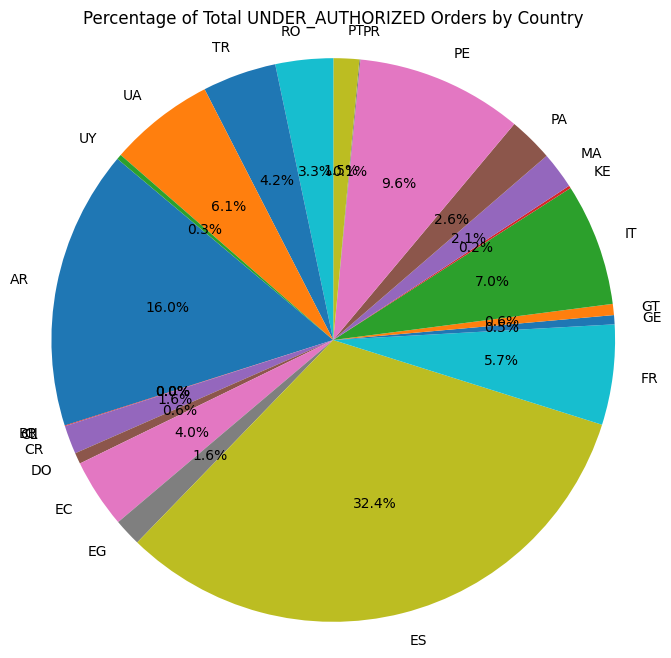

In [234]:
# UNDER_AUTHORIZED:

country_totals = df_filtered_under.groupby('country_code')['products_total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(country_totals, labels=country_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total UNDER_AUTHORIZED Orders by Country')
plt.axis('equal')  
plt.show()

In [235]:
# GROUP OTHERS (under 2%)
country_totals = pd.DataFrame(df_filtered_under.groupby('country_code')['products_total'].sum())
country_totals = country_totals.reset_index(drop=False)

# Set the threshold (under 2%)
threshold = (country_totals["products_total"].sum())*0.02

def other_country(row):
    if row['products_total'] < threshold:
        return 'Other'
    else:
        return row['country_code']

country_totals['country_code'] = country_totals.apply(other_country, axis=1)

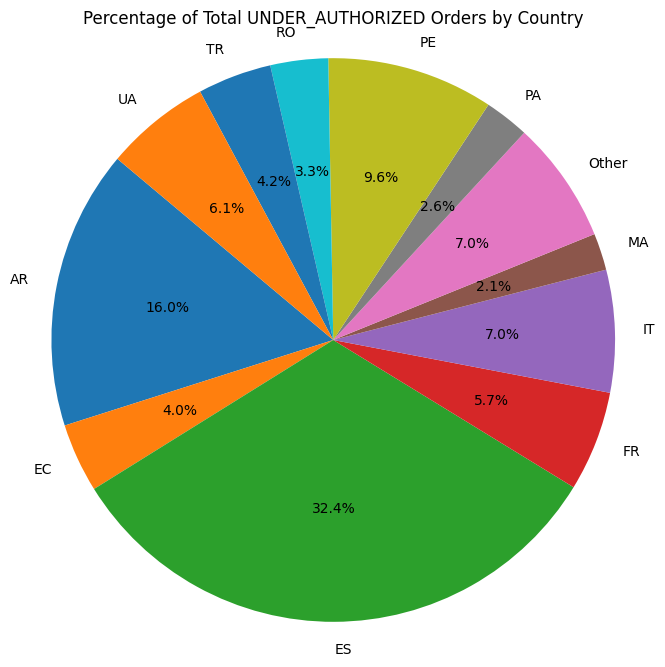

In [236]:
# GROUP OTHERS (under 2%) --> PLOT 
country_tot = country_totals.groupby('country_code')['products_total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(country_tot, labels=country_tot.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total UNDER_AUTHORIZED Orders by Country')
plt.axis('equal')  
plt.show()

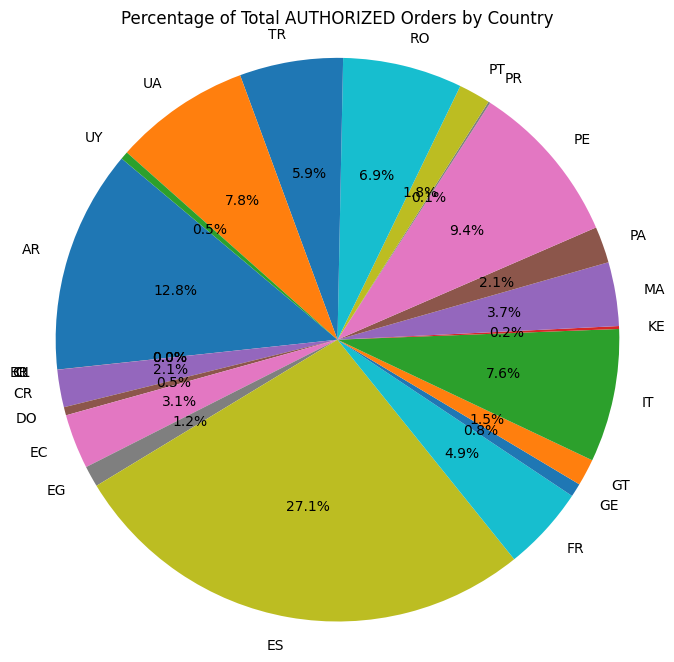

In [237]:
# Authorized
country_totals = df_filtered_auth.groupby('country_code')['products_total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(country_totals, labels=country_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total AUTHORIZED Orders by Country')
plt.axis('equal')  
plt.show()

In [238]:
# GROUP OTHERS AUTHORIZED (under 2%)
country_totals_au = pd.DataFrame(df_filtered_auth.groupby('country_code')['products_total'].sum())
country_totals_au = country_totals.reset_index(drop=False)

# Set the threshold (under 2%)
threshold = (country_totals_au["products_total"].sum())*0.02

def other_country(row):
    if row['products_total'] < threshold:
        return 'Other'
    else:
        return row['country_code']

country_totals_au['country_code'] = country_totals_au.apply(other_country, axis=1)

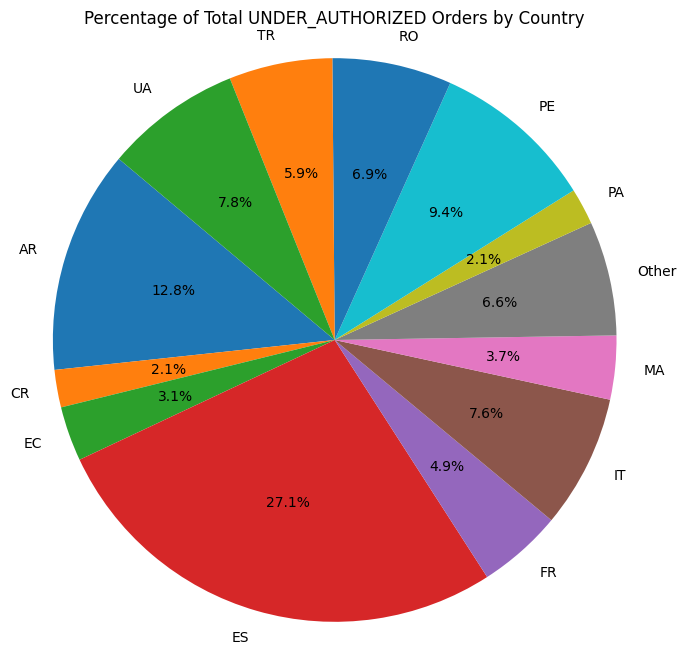

In [239]:
# GROUP OTHERS (under 2%) --> PLOT 
country_tot = country_totals_au.groupby('country_code')['products_total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(country_tot, labels=country_tot.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total UNDER_AUTHORIZED Orders by Country')
plt.axis('equal')  
plt.show()

In [240]:
#Which stores are the most problematic in terms of orders and monetary value?

In [296]:
# Subset of stores and delibery orders 
df_s1 = df[["store_address","final_status"]]
#Column for how many where Delivered
df_s1["DeliveredStatus"] = df_s1["final_status"].apply(lambda x: 1 if x == "DeliveredStatus" else 0)
#Colum for how many where canceled 
df_s1["CanceledStatus"] = df_s1["final_status"].apply(lambda x: 1 if x == "CanceledStatus" else 0)

/var/folders/k4/q8g97p495cx7f63kbs0wzyc00000gn/T/ipykernel_1356/750056383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1["DeliveredStatus"] = df_s1["final_status"].apply(lambda x: 1 if x == "DeliveredStatus" else 0)
/var/folders/k4/q8g97p495cx7f63kbs0wzyc00000gn/T/ipykernel_1356/750056383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1["CanceledStatus"] = df_s1["final_status"].apply(lambda x: 1 if x == "CanceledStatus" else 0)


In [301]:
store_status = pd.DataFrame(df_s1.groupby('store_address')[['DeliveredStatus','CanceledStatus']].sum())
# Sum od orders
store_status["all_orders"] = store_status["CanceledStatus"] + store_status["DeliveredStatus"]

In [302]:
store_status.head(5)

,DeliveredStatus,CanceledStatus,all_orders
store_address,,,
190,10,0,10
191,8,0,8
193,1,1,2
194,12,3,15
196,14,0,14


In [293]:
no_cancelations = store_status[store_status["CanceledStatus"] == 0]
cancelations = store_status[store_status["CanceledStatus"] != 0]

In [294]:
cancelations.sort_values(by='CanceledStatus', ascending=False)
cancelations

,DeliveredStatus,CanceledStatus
store_address,,
193,1,1
194,12,3
197,1,1
200,30,2
206,6,1
...,...,...
74587,25,11
74623,1,1
74649,12,2


In [288]:
cancelations["Cancel_ovr_Delivered"] = cancelations["CanceledStatus"]/store_status["DeliveredStatus"]

/var/folders/k4/q8g97p495cx7f63kbs0wzyc00000gn/T/ipykernel_1356/1317405760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelations["Cancel_ovr_Delivered"] = cancelations["CanceledStatus"]/store_status["DeliveredStatus"]


In [290]:
cancelations = cancelations[cancelations["CanceledStatus"] != np.inf]
cancelations

,DeliveredStatus,CanceledStatus,Cancel_ovr_Delivered
store_address,,,
193,1,1,1.000000
194,12,3,0.250000
197,1,1,1.000000
200,30,2,0.066667
206,6,1,0.166667
...,...,...,...
74587,25,11,0.440000
74623,1,1,1.000000
74649,12,2,0.166667


In [279]:
cancelations.sort_values(by='Cancel_ovr_Delivered', ascending=False)

,DeliveredStatus,CanceledStatus,Cancel_ovr_Delivered
store_address,,,
51430,0,1,inf
60899,0,3,inf
59404,0,2,inf
59878,0,1,inf
60374,0,1,inf
...,...,...,...
18684,67,1,0.014925
33368,80,1,0.012500
37508,86,1,0.011628


In [254]:
store_status.sort_values(by='Cancel_ovr_Delivered', ascending=False)

,DeliveredStatus,CanceledStatus,Cancel_ovr_Delivered
store_address,,,
58383,0,1,inf
67350,0,1,inf
48733,0,3,inf
56000,0,6,inf
69329,0,1,inf
...,...,...,...
49820,2,0,0.0
49830,1,0,0.0
49832,4,0,0.0
